In [51]:
FOLDER_NAME = "Posts/"

In [52]:
# Extracting files from JSON

import os
import json

countF = 0
countI = 0

InstaPostList = []

for folder in os.listdir(FOLDER_NAME):
    if folder==".ipynb_checkpoints":
        continue
    foldername = FOLDER_NAME + folder
    for file in os.listdir(foldername):
        if file==".ipynb_checkpoints":
            continue
        with open(foldername+"/"+file, "r") as f:
            posts = f.readlines()
            for post in posts:
                post = json.loads(post)
                for postF in post['result']['posts']:
                    if postF['platform']=="Instagram":
                        InstaPostList.append(postF)

In [53]:
# Removing duplicate posts

IdDict = set()
newList = []

for post in InstaPostList:
    if post['platformId'] in IdDict:
        continue
    else:
        newList.append(post)
        IdDict.add(post['platformId'])

InstaPostList = newList

In [54]:
# Monthly Post analysis
from datetime import datetime

MonthlyPost = dict()

for post in InstaPostList:
    month = datetime.strptime(post['date'], "%Y-%m-%d %H:%M:%S")
    month = "{}-{}-01".format(month.year, month.month)
    if month in MonthlyPost:
        MonthlyPost[month] += 1
    else:
        MonthlyPost[month] = 0

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

<AxesSubplot:xlabel='Month', ylabel='Number of Posts'>

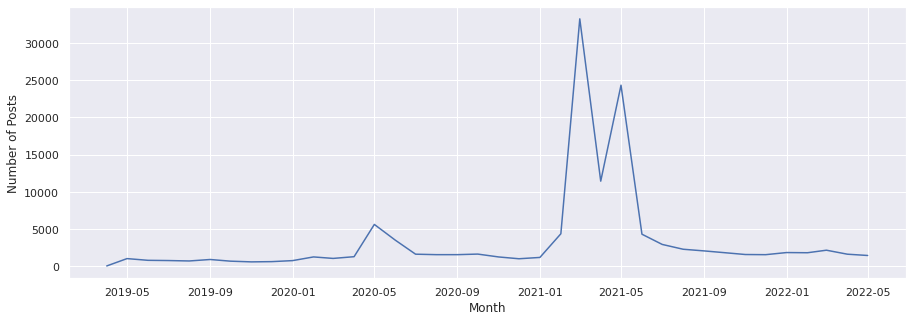

In [56]:
MonthlyPostDF = pd.DataFrame({
    "Month" : [datetime.strptime(date, "%Y-%m-%d") for date in MonthlyPost.keys()],
    "Number of Posts" : [val for val in MonthlyPost.values()]
})
plt.figure(figsize = (15,5))
sns.lineplot(x="Month", y="Number of Posts", data=MonthlyPostDF)

In [57]:
# Popular accounts/pages

Accounts = dict()

for post in InstaPostList:
    if post['account']['handle'] not in Accounts.keys():
        Accounts[post['account']['handle']] = {
            "subscriberCount" : post['account']['subscriberCount'],
            "postCount" : 0
        }
    Accounts[post['account']['handle']]['subscriberCount'] = max(Accounts[post['account']['handle']]['subscriberCount'], post['account']['subscriberCount'])
    Accounts[post['account']['handle']]['postCount'] += 1

In [58]:
AccountsSubs = {k: v for k, v in sorted(Accounts.items(), key=lambda item: item[1]['subscriberCount'], reverse=True)[:15]}

for accn in AccountsSubs.keys():
    print("Account - {}, Subscriber Count - {}, Post Count - {}".format(accn, AccountsSubs[accn]['subscriberCount'], AccountsSubs[accn]['postCount']))

Account - instagram, Subscriber Count - 500854177, Post Count - 2
Account - justinbieber, Subscriber Count - 233442226, Post Count - 1
Account - nike, Subscriber Count - 215313186, Post Count - 1
Account - theellenshow, Subscriber Count - 118796816, Post Count - 3
Account - priyankachopra, Subscriber Count - 77049962, Post Count - 1
Account - nba, Subscriber Count - 66627796, Post Count - 4
Account - marvel, Subscriber Count - 63860679, Post Count - 3
Account - 9gag, Subscriber Count - 58306934, Post Count - 1
Account - hudabeauty, Subscriber Count - 50236474, Post Count - 1
Account - krisjenner, Subscriber Count - 47340152, Post Count - 1
Account - vanessahudgens, Subscriber Count - 45121683, Post Count - 1
Account - buzzfeedtasty, Subscriber Count - 42426365, Post Count - 5
Account - dior, Subscriber Count - 40348502, Post Count - 3
Account - voguemagazine, Subscriber Count - 38256096, Post Count - 6
Account - disney, Subscriber Count - 33342659, Post Count - 6


In [59]:
AccountsPosts = {k: v for k, v in sorted(Accounts.items(), key=lambda item: item[1]['postCount'], reverse=True)[:15]}

for accn in AccountsPosts.keys():
    print("Account - {}, Subscriber Count - {}, Post Count - {}".format(accn, AccountsPosts[accn]['subscriberCount'], AccountsPosts[accn]['postCount']))

Account - thewowmag, Subscriber Count - 9797, Post Count - 2073
Account - pacificclothing209, Subscriber Count - 6555, Post Count - 1432
Account - asianfeed, Subscriber Count - 140813, Post Count - 1010
Account - terasaki.budokan, Subscriber Count - 11204, Post Count - 789
Account - aapiwomenlead, Subscriber Count - 110903, Post Count - 753
Account - untigering, Subscriber Count - 44707, Post Count - 700
Account - fromgirltogirl, Subscriber Count - 252, Post Count - 639
Account - omg_sportswearthailand, Subscriber Count - 66506, Post Count - 526
Account - monistat, Subscriber Count - 5956, Post Count - 524
Account - knowyourracists, Subscriber Count - 22409, Post Count - 491
Account - nextshark, Subscriber Count - 511713, Post Count - 464
Account - asian_storm, Subscriber Count - 3710, Post Count - 463
Account - eastmeetsdress, Subscriber Count - 12616, Post Count - 450
Account - filipinosfortrump, Subscriber Count - 974, Post Count - 445
Account - racismisavirus, Subscriber Count - 75

In [60]:
# Overall word analysis

from gensim.parsing.preprocessing import remove_stopwords
import re

wordCount = dict()

for post in InstaPostList:
    try:
        text = post['message']
    except:
        try:
            text = post['description']
        except:
            continue 
    text = re.sub(r'http\S+', '', text)
    text = text.replace('\n'," ")
    text = text.replace('\t'," ")
    text = text.lower()
    res = re.sub(r'[^\w\s]', ' ', text)
    res = remove_stopwords(res)
    words = res.split()
    for word in words:
        if(len(word) <= 1):
            continue
        if word not in wordCount.keys():
            wordCount[word] = 0
        wordCount[word] += 1

In [61]:
wordCountSorted = sorted(wordCount, key=wordCount.get, reverse=True)

In [62]:
wordCountSorted[:15]

['asian',
 'stopasianhate',
 'aapi',
 'community',
 'american',
 'hate',
 'people',
 'asianamerican',
 'racism',
 'stopaapihate',
 'love',
 'link',
 'bio',
 'support',
 'like']

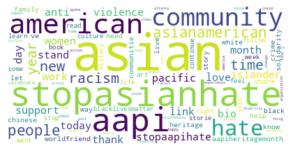

In [63]:
# Word cloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud

txt = ""
for word in wordCount.keys():
    for i in range(wordCount[word]):
        txt += word + " "

plt.figure(figsize = (5,5))
word_cloud = WordCloud(collocations = False, background_color = 'white', max_words=100).generate(txt)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [64]:
# Hashtag freuqency
import re

all_hashtags = dict()
hashtag_re = re.compile("#\w+ ")

for post in InstaPostList:
    try:
        line = post['message']
    except:
        try:
            line = post['description']
        except:
            continue 
    try:
        line = line.strip();
        line = line.lower();
    except:
        continue;
    tweet = line;
    hashtags = re.findall(hashtag_re,tweet);
    if(len(hashtags)>0):
        for hashtag in hashtags:
            hashtag = hashtag.strip();
            if(len(hashtag)<3):
                continue;
            if hashtag in all_hashtags.keys():
                all_hashtags[hashtag] += 1
            else:
                all_hashtags[hashtag] = 1

In [65]:
all_hashtags = {k:v for k,v in sorted(all_hashtags.items(), key=lambda item: item[1], reverse=True)}

In [66]:
all_hashtags

{'#stopasianhate': 33611,
 '#asianamerican': 21324,
 '#aapi': 20364,
 '#stopaapihate': 10822,
 '#blacklivesmatter': 8648,
 '#aapiheritagemonth': 8415,
 '#asian': 6883,
 '#stopthehate': 6411,
 '#blm': 5047,
 '#asianrepresentation': 4212,
 '#apahm': 4169,
 '#hateisavirus': 3763,
 '#racism': 3601,
 '#asianlivesmatter': 3331,
 '#repost': 3315,
 '#diversity': 3283,
 '#racismisavirus': 3109,
 '#representationmatters': 2822,
 '#nojusticenopeace': 2759,
 '#love': 2718,
 '#fashion': 2712,
 '#equality': 2541,
 '#stopracism': 2469,
 '#asianpride': 2435,
 '#chineseamerican': 2308,
 '#antiracism': 2251,
 '#filipino': 2212,
 '#aapihm': 2098,
 '#asianamericans': 2073,
 '#endracism': 2072,
 '#losangeles': 1929,
 '#thewowmag': 1894,
 '#art': 1806,
 '#solidarity': 1751,
 '#stopasianhatecrimes': 1716,
 '#asianmodel': 1657,
 '#covid19': 1636,
 '#community': 1617,
 '#instagood': 1572,
 '#georgefloyd': 1520,
 '#nyc': 1518,
 '#policebrutality': 1505,
 '#racisminamerica': 1503,
 '#asianheritagemonth': 1480,
 

In [67]:
# URL Frequency
URLs = dict()

for post in InstaPostList:
  try:
    post = post['expandedLinks']

    for link in post:
      url = link['original']
      if url not in URLs.keys():
        URLs[url] = 0
      URLs[url] += 1
  except:
    continue

In [68]:
URLs = {k:v for k,v in sorted(URLs.items(), key=lambda item:item[1], reverse=True)}

In [69]:
URLs

{'twitter.com/obie_sbtsbc': 295,
 'instagram.com/obie_sbtsbc': 295,
 'www.omgsportswearasia.com': 295,
 'https://www.facebook.com/ambemuz': 250,
 'www.stretch-four.com': 225,
 'https://stopaapihate.org/': 129,
 'https://www.instagram.com/touchofgold_official': 109,
 'gofundme.com/AAPI': 104,
 'gofundme.com/aapi': 87,
 'https://anti-asianviolenceresources.carrd.co/': 64,
 'paypal.me/eadiscussion': 53,
 'www.stopaapihate.org': 52,
 'www.starmometer.com': 52,
 'www.imreadymovement.org/donate': 45,
 'GoFundMe.com/AAPI': 44,
 'https://www.gofundme.com/c/act/stop-aapi-hate': 43,
 'SeeUsUnite.org/Unite': 40,
 'https://stopaapihate.org': 38,
 'http://nyc.gov/reportdiscrimination': 37,
 'https://www.gofundme.com/f/support-aapi-community-fund': 36,
 'http://ow.ly/shK550CZgUN': 36,
 'https://asiangoldribbon.com/': 32,
 'www.racismisavirus.com': 31,
 'https://www.apitaskforce.org/.': 31,
 'http://bit.ly/3rBo8e6': 28,
 'acttochange.org/2021dayagainstbullying': 27,
 'https://www.apitaskforce.org/cov

In [70]:
# Reach analysis
favCount = []
CommentCount = []

for post in InstaPostList:
  try:
    favCount.append(post['statistics']['actual']['favoriteCount'])
    CommentCount.append(post['statistics']['actual']['commentCount'])
  except:
    continue
    
import statistics 

print("Favorite count - Mean = {}, Median = {}, Standard Deviation = {}, Max = {}".format(statistics.mean(favCount), statistics.median(favCount), statistics.stdev(favCount), max(favCount)))
print("Comment count - Mean = {}, Median = {}, Standard Deviation = {}, Max = {}".format(statistics.mean(CommentCount), statistics.median(CommentCount), statistics.stdev(CommentCount), max(CommentCount)))

Favorite count - Mean = 1516.461939164677, Median = 119.0, Standard Deviation = 14370.117774593986, Max = 2543924
Comment count - Mean = 32.42235899662026, Median = 4.0, Standard Deviation = 271.7069835774403, Max = 52892


In [71]:
# Word vector analysis

from gensim.models import Word2Vec
import os
import json
import re
import matplotlib.pyplot as plt
from gensim.parsing.preprocessing import remove_stopwords
import nltk

nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/mithundas/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [72]:
sentences = []

for post in InstaPostList:
    try:
        text = post['message']
    except:
        try:
            text = post['description']
        except:
            continue 
    text = re.sub(r'http\S+', '', text)
    text = text.replace('\n'," ")
    text = text.replace('\t'," ")
    text = text.lower()
    res = re.sub(r'[^\w\s]', ' ', text)
    res = remove_stopwords(res)
    txt = []
    words = res.split()
    for word in words:
        if(len(word) <= 1):
            continue
        txt.append(word)
    sentences.append(txt)

In [73]:
model = Word2Vec(sentences=sentences, window=5, min_count=1, workers=4)

In [74]:
IntialWordList = ["asian", "virus", "coronavirus", "chinese"]

In [75]:
for word in IntialWordList:
    sims = model.wv.most_similar(word, topn=10)
    print("----------------------------------------------------")
    print("Word similar to {}: ".format(word))
    for word, score in sims:
        print("Word - {}, Similarity score - {}".format(word, score))
    print("----------------------------------------------------")

----------------------------------------------------
Word similar to asian: 
Word - especially, Similarity score - 0.6717767715454102
Word - specifically, Similarity score - 0.6620075702667236
Word - korean, Similarity score - 0.6474164724349976
Word - filipino, Similarity score - 0.6459546089172363
Word - african, Similarity score - 0.6448317766189575
Word - asians, Similarity score - 0.6356001496315002
Word - aapi, Similarity score - 0.6336830854415894
Word - particularly, Similarity score - 0.6257987022399902
Word - chinese, Similarity score - 0.6193641424179077
Word - targeted, Similarity score - 0.6130532026290894
----------------------------------------------------
----------------------------------------------------
Word similar to virus: 
Word - coronavirus, Similarity score - 0.7486047148704529
Word - flu, Similarity score - 0.7377546429634094
Word - blame, Similarity score - 0.7152029275894165
Word - infecting, Similarity score - 0.7149133682250977
Word - scapegoat, Similarit

In [76]:
import networkx as nx
from numpy import dot
from numpy.linalg import norm
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import community.community_louvain as community_louvain

In [77]:
!pip3 install python-louvain

You should consider upgrading via the '/home/mithundas/anaconda3/bin/python -m pip install --upgrade pip' command.


In [78]:
numLevel = 2
thres = 0.5

G = nx.Graph()

def makeGraph(words, lev=2):
    for word in words:
        if word not in G.nodes():
            G.add_node(word)
            sims = model.wv.most_similar(word, topn=10)
            newWordList = []
            for wordN,sim in sims:
                if sim>thres:
                    newWordList.append(wordN)
            if lev>0:
                makeGraph(newWordList, lev-1)
                for wordN, sim in sims:
                    if sim>thres:
                        G.add_edge(word, wordN, weight=sim)
    return

In [79]:
makeGraph(IntialWordList)
G = G.to_undirected()
partitionLev2 = community_louvain.best_partition(G)

In [80]:
ns = []
for node in G.nodes():
    ns.append(wordCount[node])
mns = statistics.mean(ns)
for i in range(len(ns)):
    ns[i] /= mns

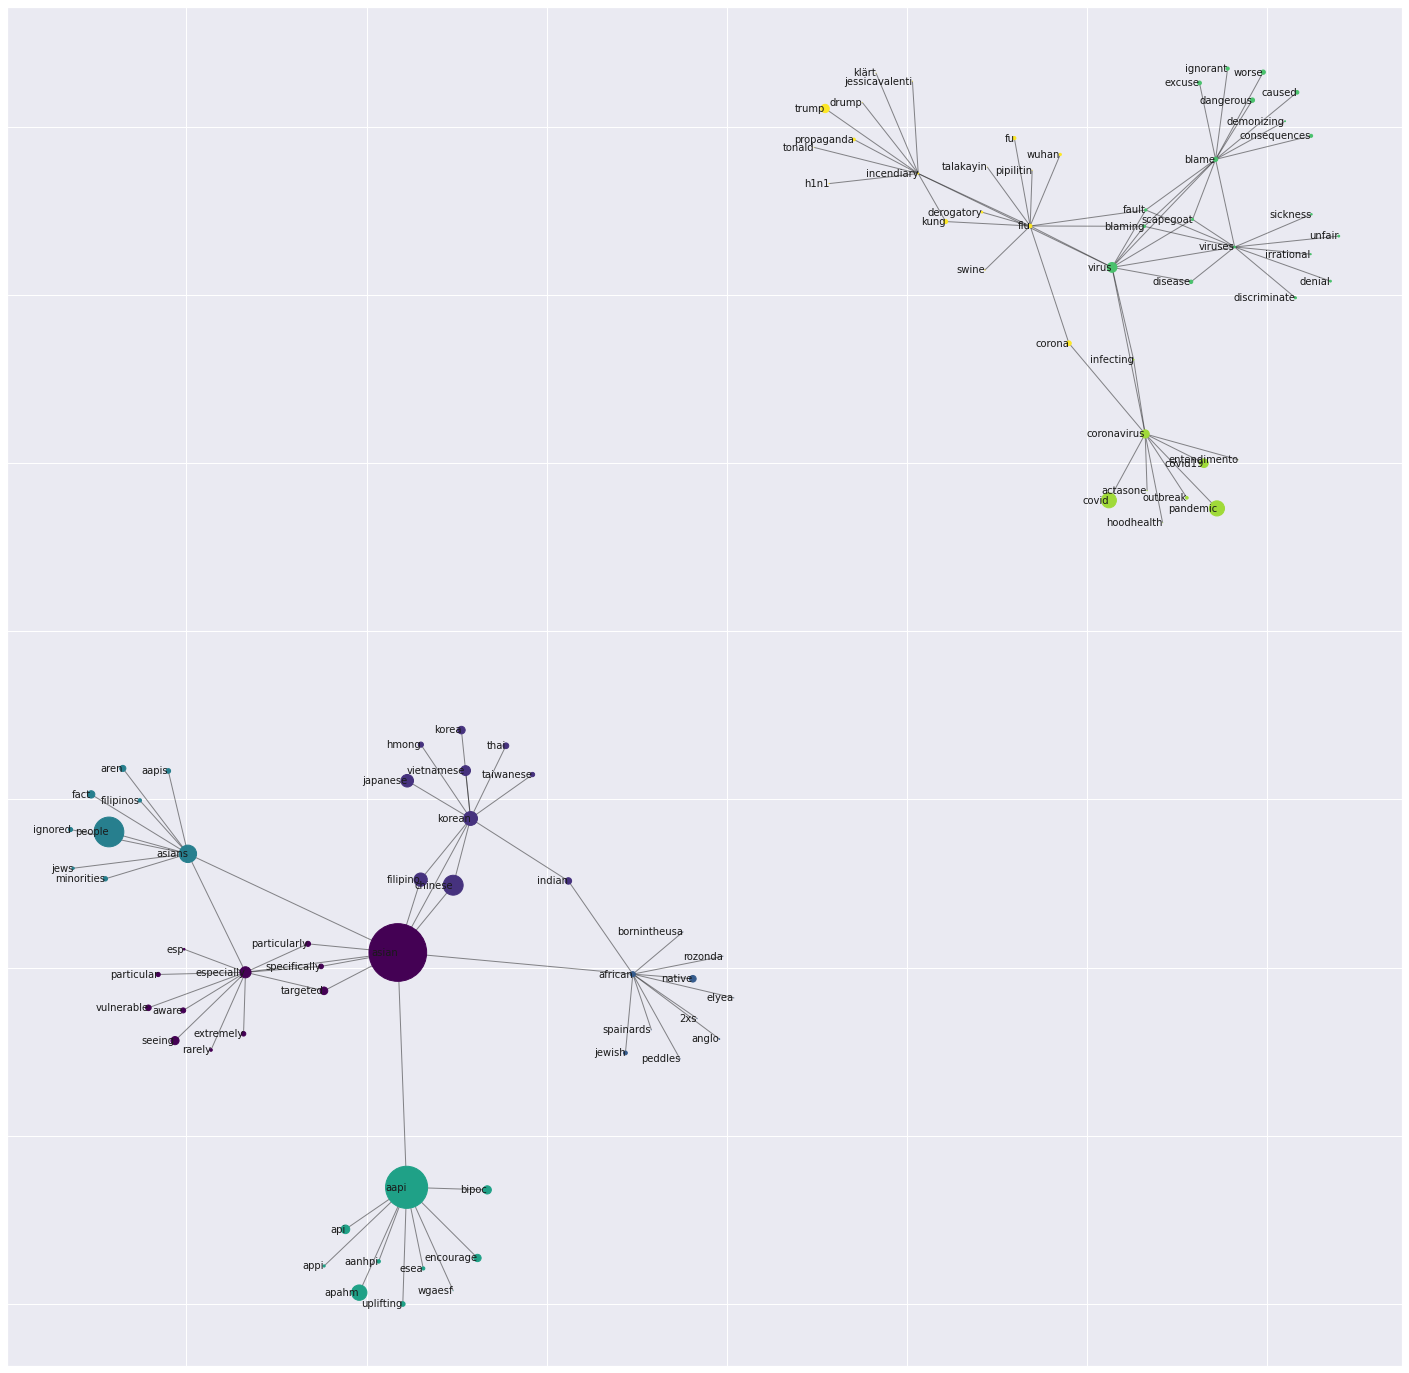

In [81]:
pos = nx.spring_layout(G)
plt.figure(figsize = (25,25))
# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(partitionLev2.values()) + 1)
nx.draw_networkx_nodes(G, pos, partitionLev2.keys(), node_size=[100*x for x in ns], cmap=cmap, node_color=list(partitionLev2.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=10, horizontalalignment="right")
plt.show()

In [82]:
# Topic modelling

import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
import re
from nltk.corpus import stopwords
from gensim.parsing.preprocessing import remove_stopwords

stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])


data_words = []
for post in InstaPostList:
    try:
        text = post['message']
    except:
        try:
            text = post['description']
        except:
            continue 
    text = re.sub(r'http\S+', '', text)
    res = re.sub(r'[^\w\s]', ' ', text)
    res = remove_stopwords(res)
    data_word = simple_preprocess(res)
    data_word = [word for word in data_word if word not in stop_words]
    data_words.append(data_word)

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/mithundas/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [83]:
import gensim.corpora as corpora

id2word = corpora.Dictionary(data_words)
texts = data_words
corpus = [id2word.doc2bow(text) for text in texts]

In [84]:
from pprint import pprint
import warnings
# number of topics
num_topics = 10
# Build LDA model
warnings.simplefilter("ignore")
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                    id2word=id2word,
                                    num_topics=num_topics)

In [85]:
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())

[(0,
  '0.013*"asian" + 0.007*"asianamerican" + 0.007*"aapi" + 0.006*"community" + '
  '0.005*"american" + 0.004*"stopasianhate" + 0.004*"month" + 0.003*"pacific" '
  '+ 0.003*"link" + 0.003*"hate"'),
 (1,
  '0.018*"asian" + 0.007*"aapi" + 0.006*"stopasianhate" + 0.006*"american" + '
  '0.005*"community" + 0.005*"asianamerican" + 0.004*"link" + 0.004*"people" + '
  '0.004*"women" + 0.003*"bio"'),
 (2,
  '0.024*"asian" + 0.009*"stopasianhate" + 0.008*"hate" + 0.008*"aapi" + '
  '0.006*"community" + 0.006*"american" + 0.005*"racism" + '
  '0.005*"stopaapihate" + 0.004*"support" + 0.004*"asianamerican"'),
 (3,
  '0.011*"asian" + 0.010*"aapi" + 0.006*"stopasianhate" + 0.005*"people" + '
  '0.004*"racism" + 0.004*"today" + 0.004*"community" + 0.003*"stopaapihate" + '
  '0.003*"black" + 0.003*"month"'),
 (4,
  '0.010*"asian" + 0.009*"aapi" + 0.007*"american" + 0.006*"asianamerican" + '
  '0.005*"community" + 0.005*"stopasianhate" + 0.004*"love" + 0.003*"link" + '
  '0.002*"time" + 0.002*"chi

In [86]:
# Hashtag co-ocurrence analysis

currhashs = [k for (k,v) in all_hashtags.items() if v>200]

CorrCount = dict()
for hashtag in currhashs:
    CorrCount[hashtag] = dict()
    for hashtag2 in currhashs:
        if hashtag!=hashtag2:
            CorrCount[hashtag][hashtag2] = 0

In [87]:
hashtag_re = re.compile("#\w+ ")

for post in InstaPostList:
    try:
        line = post['message']
    except:
        try:
            line = post['description']
        except:
            continue 
    try:
        line = line.strip();
        line = line.lower();
    except:
        continue;
    tweet = line;
    hashtags = re.findall(hashtag_re,tweet);
    if(len(hashtags)>0):
        for hashtag in hashtags:
            hashorig = hashtag
            hashtag = hashtag.strip();
            if len(hashtag)<3:
                hashtags.remove(hashorig)
        for hashtag1 in hashtags:
            for hashtag2 in hashtags:
                hashtag1 = hashtag1.strip()
                hashtag2 = hashtag2.strip()
                if hashtag1!=hashtag2 and (hashtag1 in currhashs) and (hashtag2 in currhashs):
                    CorrCount[hashtag1][hashtag2] += 1

In [88]:
import networkx as nx
from numpy import dot
from numpy.linalg import norm
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import community.community_louvain as community_louvain

In [89]:
G = nx.Graph()

def makeGraph():
    for hashtag in currhashs:
        G.add_node(hashtag)
    for hashtag1 in currhashs:
        for hashtag2 in currhashs:
            if hashtag1!=hashtag2:
                if CorrCount[hashtag1][hashtag2]!=0:
                    weight = float(float(CorrCount[hashtag1][hashtag2]) / float(all_hashtags[hashtag1] * all_hashtags[hashtag2]))
                    G.add_edge(hashtag1, hashtag2, weight = weight)
    return

In [90]:
makeGraph()
G = G.to_undirected()
partitionLev2 = community_louvain.best_partition(G)

In [91]:
import statistics
import warnings

warnings.simplefilter("ignore")

ns = []
for node in G.nodes():
    ns.append(all_hashtags[node])
mns = statistics.mean(ns)
for i in range(len(ns)):
    ns[i] /= mns

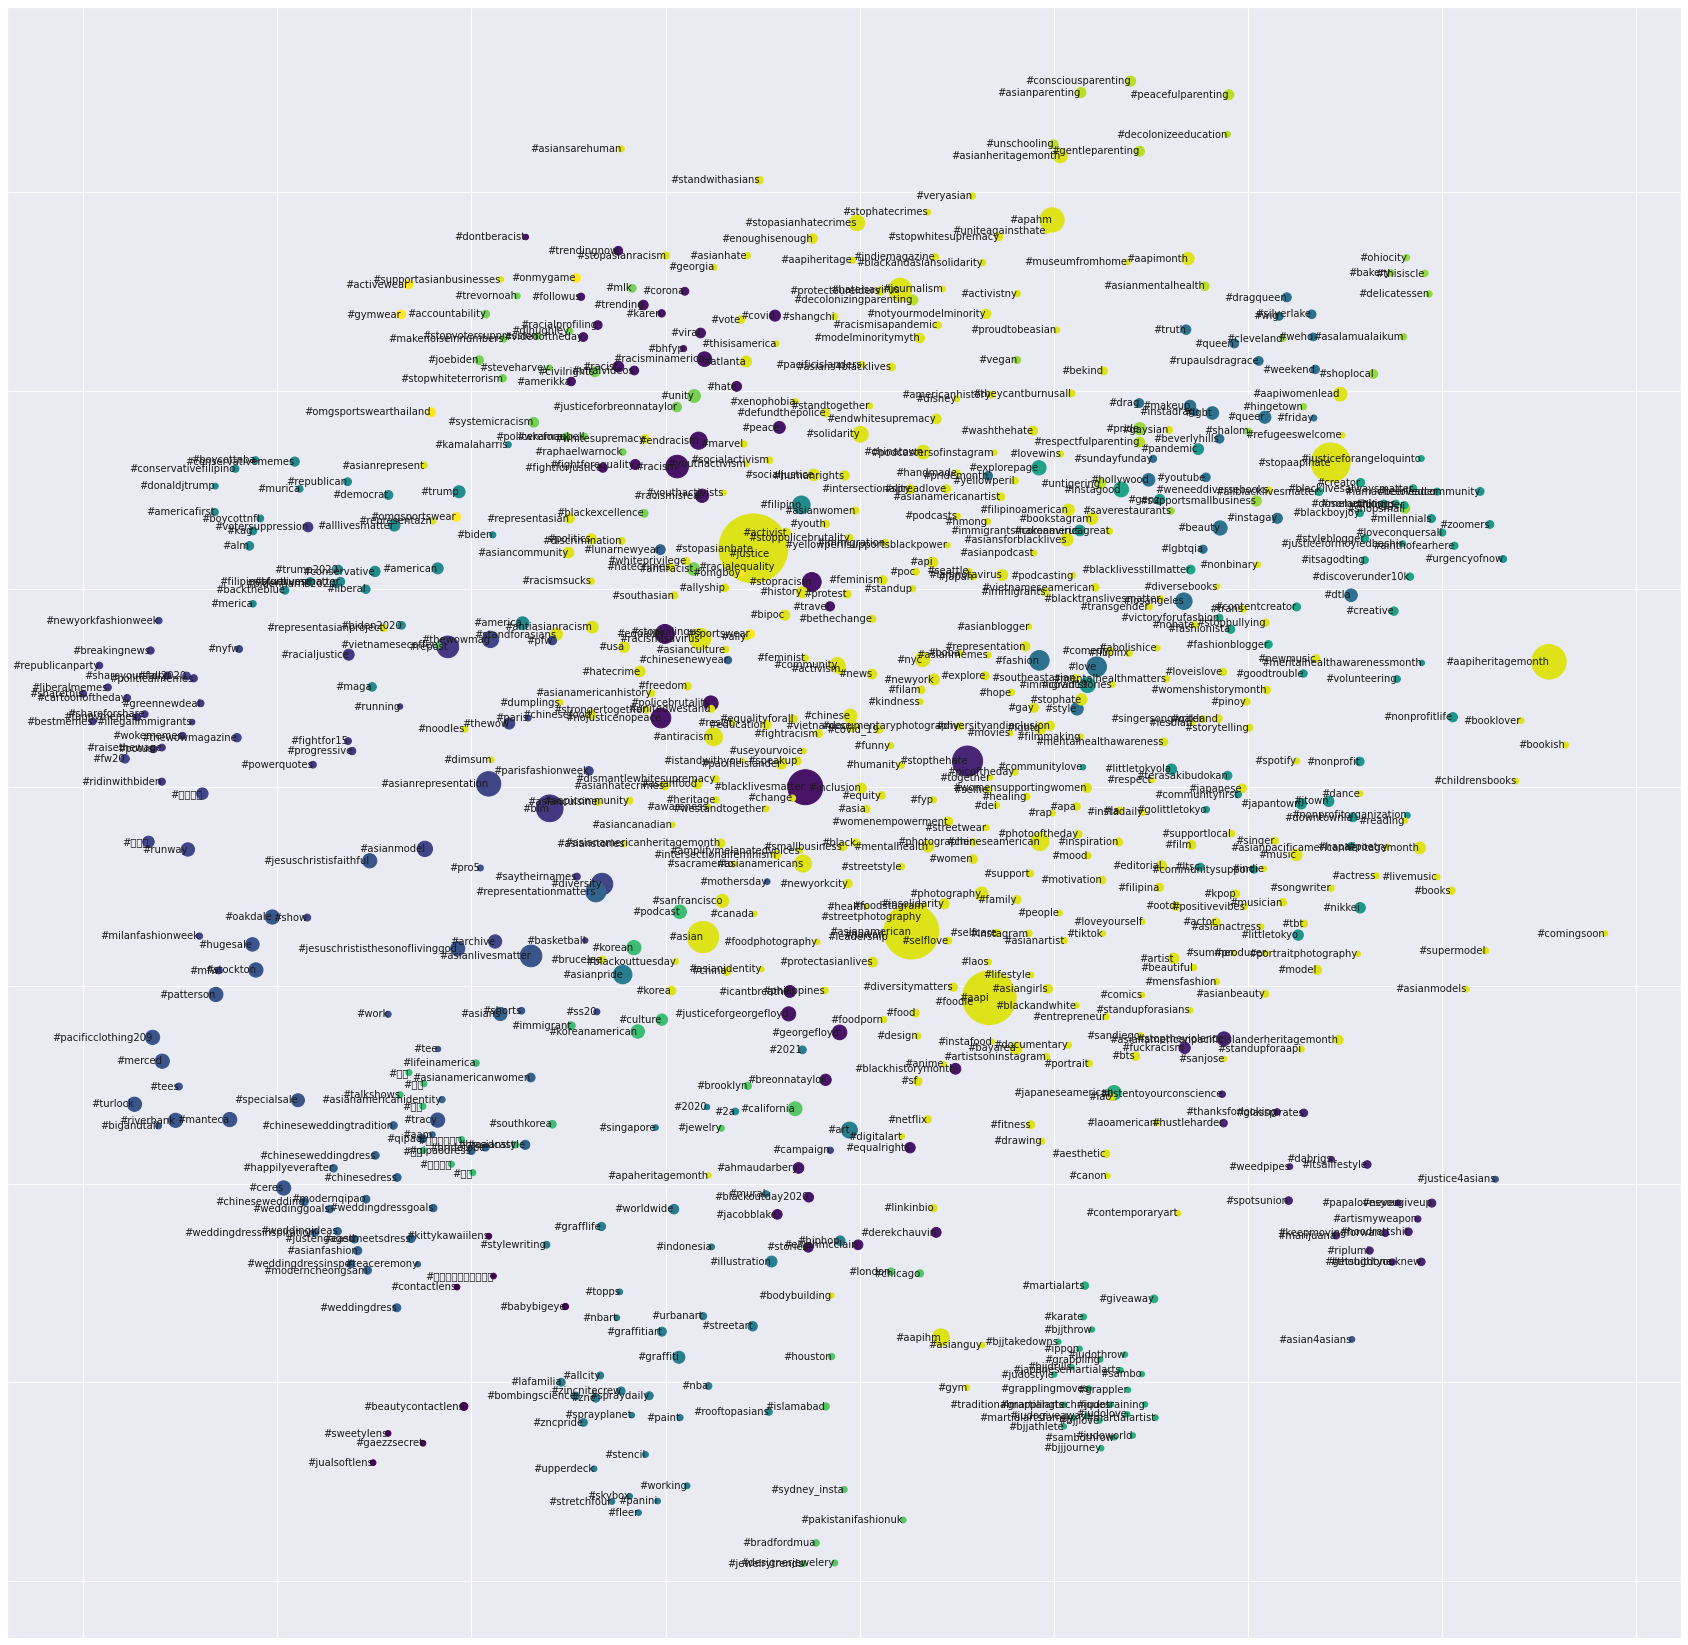

In [92]:
pos = nx.spring_layout(G)
plt.figure(figsize = (30,30))
# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(partitionLev2.values()) + 1)
nx.draw_networkx_nodes(G, pos, partitionLev2.keys(), node_size=[100*x for x in ns], cmap=cmap, node_color=list(partitionLev2.values()))
# nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=10, horizontalalignment="right")
plt.show()

In [95]:
# Post language analysis

languageCount = dict()

for post in InstaPostList:
    langCode = post["languageCode"]
    if langCode not in languageCount.keys():
        languageCount[langCode] = 0
    languageCount[langCode]+=1

In [98]:
languageCount = {k:v for k,v in sorted(languageCount.items(), key=lambda item:item[1], reverse=True)}

languageCount

{'en': 92561,
 'und': 31975,
 'th': 906,
 'es': 472,
 'ja': 413,
 'de': 350,
 'pt': 281,
 'id': 278,
 'fr': 201,
 'ko': 170,
 'zh-TW': 101,
 'nl': 101,
 'tl': 97,
 'it': 88,
 'sv': 80,
 'zh-CN': 72,
 'hi': 69,
 'ar': 67,
 'ru': 51,
 'fy': 49,
 'mg': 46,
 'ms': 39,
 'vi': 37,
 'tr': 32,
 'ml': 29,
 'st': 26,
 'da': 22,
 'mr': 22,
 'km': 21,
 'no': 20,
 'pl': 19,
 'su': 18,
 'eo': 16,
 'haw': 15,
 'te': 14,
 'el': 13,
 'fi': 12,
 'gu': 11,
 'bs': 11,
 'fa': 10,
 'my': 10,
 'co': 10,
 'gl': 9,
 'zu': 9,
 'sw': 9,
 'ht': 9,
 'pa': 8,
 'mi': 8,
 'et': 8,
 'hmn': 7,
 'kn': 7,
 'sq': 6,
 'ro': 6,
 'cs': 6,
 'af': 5,
 'lt': 5,
 'jw': 5,
 'sl': 5,
 'ceb': 4,
 'kk': 4,
 'ur': 4,
 'lv': 4,
 'eu': 4,
 'yo': 3,
 'ca': 3,
 'xh': 3,
 'yi': 3,
 'so': 3,
 'lb': 3,
 'ha': 2,
 'sn': 2,
 'uk': 2,
 'sk': 2,
 'iw': 1,
 'gd': 1,
 'is': 1,
 'cy': 1,
 'ta': 1,
 'uz': 1,
 'mn': 1,
 'la': 1,
 'ne': 1,
 'ny': 1,
 'sm': 1}